Accuracy: 1.00
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


<ipython-input-3-705a1c691b4f>:57: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', label='Decision Boundary')


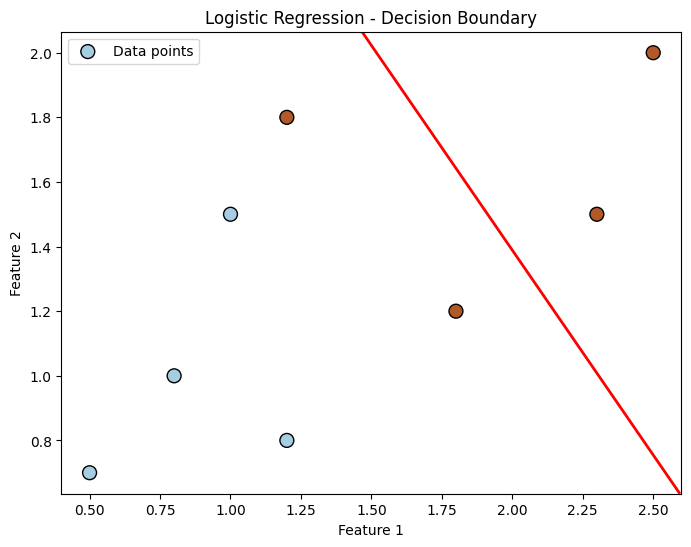

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Sample dataset
X_custom = np.array([
    [1.2, 0.8],
    [2.3, 1.5],
    [0.5, 0.7],
    [1.8, 1.2],
    [1.0, 1.5],
    [2.5, 2.0],
    [1.2, 1.8],
    [0.8, 1.0]
])

y_custom = np.array([0, 1, 0, 1, 0, 1, 1, 0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_custom, y_custom, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
clf = LogisticRegression()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

# Plotting the decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
plt.scatter(X_custom[:, 0], X_custom[:, 1], c=y_custom, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100, label='Data points')

# Plotting the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression - Decision Boundary')
plt.legend()
plt.show()
